In [1]:
# modules required for handling dataframes
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [2]:
sourcedir = '/home/yiheng/MinION_data' # the directory where all the documents of each sequencing run are stored.
db = "refseq_fungi_updated" # database used
# please note that there are other places of this script that require understanding and hard coding skills which I also commented below.

In [3]:
def add_df_headers(df, header_list):
    df.columns = header_list

def trim_df_columns(df,column_list):
    df.drop(columns=column_list, inplace=True)
    
def subset_blast_df_evalue(blast_df, evalue):
    subset_blast_df = blast_df[blast_df.log_evalue > int(evalue)]
    return subset_blast_df

def subset_blast_df_pident(blast_df, pident):
    subset_blast_df = blast_df[blast_df.pident > int(pident)]
    return subset_blast_df

def get_pmatch_df(sample, sequencing_tech):
    if sample == 'IE':
        barcode = '05'
        pass
    elif sample == 'MC':
        barcode = '06'
        pass
    else:
        print('wrong sample name.')
    
    if sequencing_tech == 'nanopore':
        pmatch_success_df = pd.read_csv(os.path.join(sourcedir, 'barcode%s' % barcode,'barcode%s.%sdb_pmatch_success.tab' % (barcode, db)),
                                        index_col=0, sep='\t')
        pmatch_completeness_df = pd.read_csv(os.path.join(sourcedir, 'barcode%s' % barcode, 'barcode%s.%sdb_pmatch_completeness.tab' % (barcode, db)),
                                             index_col=0, sep='\t')
        pmatch_remaining_df = pd.read_csv(os.path.join(sourcedir, 'barcode%s' % barcode, 'barcode%s.%sdb_pmatch_remaining.tab' % (barcode, db)),
                                             index_col=0, sep='\t')
    elif sequencing_tech == 'illumina':
        pmatch_success_df = pd.read_csv(os.path.join(sourcedir, 'mock_com', 'illumina', '%s1' % sample, '%s1.%s.pmatch_success.tab' % (sample, db)),
                                        index_col=0, sep='\t')
        pmatch_completeness_df = pd.read_csv(os.path.join(sourcedir, 'mock_com', 'illumina', '%s1' % sample, '%s1.%s.pmatch_completeness.tab' % (sample, db)),
                                        index_col=0, sep='\t')
        pmatch_remaining_df = pd.read_csv(os.path.join(sourcedir, 'mock_com', 'illumina', '%s1' % sample, '%s1.%s.pmatch_remaining.tab' % (sample, db)),
                                        index_col=0, sep='\t')
    else:
        pass
    success_completeness_df = pd.merge(pmatch_success_df, pmatch_completeness_df, how="outer", left_on='pmatch', right_on='pmatch')
    pmatch_df = pd.merge(success_completeness_df, pmatch_remaining_df, how="outer", left_on='pmatch', right_on='pmatch')
    
    return pmatch_df

def get_pident_df(sample, sequencing_tech):
    if sample == 'IE':
        barcode = '05'
        pass
    elif sample == 'MC':
        barcode = '06'
        pass
    else:
        print('wrong sample name.')
    
    if sequencing_tech == 'nanopore':
        pident_success_df = pd.read_csv(os.path.join(sourcedir, 'barcode%s' % barcode,'barcode%s.%sdb_pident_success.tab' % (barcode, db)),
                                        index_col=0, sep='\t')
        pident_completeness_df = pd.read_csv(os.path.join(sourcedir, 'barcode%s' % barcode, 'barcode%s.%sdb_pident_completeness.tab' % (barcode, db)),
                                             index_col=0, sep='\t')
        pident_remaining_df = pd.read_csv(os.path.join(sourcedir, 'barcode%s' % barcode, 'barcode%s.%sdb_pident_remaining.tab' % (barcode, db)),
                                             index_col=0, sep='\t')
    elif sequencing_tech == 'illumina':
        pident_success_df = pd.read_csv(os.path.join(sourcedir, 'mock_com', 'illumina', '%s1' % sample, '%s1.%s.pident_success.tab' % (sample, db)),
                                        index_col=0, sep='\t')
        pident_completeness_df = pd.read_csv(os.path.join(sourcedir, 'mock_com', 'illumina', '%s1' % sample, '%s1.%s.pident_completeness.tab' % (sample, db)),
                                        index_col=0, sep='\t')
        pident_remaining_df = pd.read_csv(os.path.join(sourcedir, 'mock_com', 'illumina', '%s1' % sample, '%s1.%s.pident_remaining.tab' % (sample, db)),
                                        index_col=0, sep='\t')
    else:
        pass
    success_completeness_df = pd.merge(pident_success_df, pident_completeness_df, how="outer", left_on='pident', right_on='pident')
    pident_df = pd.merge(success_completeness_df, pident_remaining_df, how="outer", left_on='pident', right_on='pident')
    
    return pident_df

def get_evalue_df(sample, sequencing_tech):
    if sample == 'IE':
        barcode = '05'
        pass
    elif sample == 'MC':
        barcode = '06'
        pass
    else:
        print('wrong sample name.')
    
    if sequencing_tech == 'nanopore':
        evalue_success_df = pd.read_csv(os.path.join(sourcedir, 'barcode%s' % barcode,'barcode%s.%sdb_evalue_success.tab' % (barcode, db)),
                                        index_col=0, sep='\t')
        evalue_completeness_df = pd.read_csv(os.path.join(sourcedir, 'barcode%s' % barcode, 'barcode%s.%sdb_evalue_completeness.tab' % (barcode, db)),
                                             index_col=0, sep='\t')
        evalue_remaining_df = pd.read_csv(os.path.join(sourcedir, 'barcode%s' % barcode, 'barcode%s.%sdb_evalue_remaining.tab' % (barcode, db)),
                                             index_col=0, sep='\t')
    elif sequencing_tech == 'illumina':
        evalue_success_df = pd.read_csv(os.path.join(sourcedir, 'mock_com', 'illumina', '%s1' % sample, '%s1.%s.evalue_success.tab' % (sample, db)),
                                        index_col=0, sep='\t')
        evalue_completeness_df = pd.read_csv(os.path.join(sourcedir, 'mock_com', 'illumina', '%s1' % sample, '%s1.%s.evalue_completeness.tab' % (sample, db)),
                                        index_col=0, sep='\t')
        evalue_remaining_df = pd.read_csv(os.path.join(sourcedir, 'mock_com', 'illumina', '%s1' % sample, '%s1.%s.evalue_remaining.tab' % (sample, db)),
                                        index_col=0, sep='\t')
    else:
        pass
    success_completeness_df = pd.merge(evalue_success_df, evalue_completeness_df, how="outer", left_on='evalue', right_on='evalue')
    evalue_df = pd.merge(success_completeness_df, evalue_remaining_df, how="outer", left_on='evalue', right_on='evalue')
    
    return evalue_df

def get_length_df(sample, sequencing_tech):
    if sample == 'IE':
        barcode = '05'
        pass
    elif sample == 'MC':
        barcode = '06'
        pass
    else:
        print('wrong sample name.')
    
    if sequencing_tech == 'nanopore':
        length_success_df = pd.read_csv(os.path.join(sourcedir, 'barcode%s' % barcode,'barcode%s.%sdb_length_success.tab' % (barcode, db)),
                                        index_col=0, sep='\t')
        length_completeness_df = pd.read_csv(os.path.join(sourcedir, 'barcode%s' % barcode, 'barcode%s.%sdb_length_completeness.tab' % (barcode, db)),
                                             index_col=0, sep='\t')
        length_remaining_df = pd.read_csv(os.path.join(sourcedir, 'barcode%s' % barcode, 'barcode%s.%sdb_length_remaining.tab' % (barcode, db)),
                                             index_col=0, sep='\t')
    elif sequencing_tech == 'illumina':
        length_success_df = pd.read_csv(os.path.join(sourcedir, 'mock_com', 'illumina', '%s1' % sample, '%s1.%s.length_success.tab' % (sample, db)),
                                        index_col=0, sep='\t')
        length_completeness_df = pd.read_csv(os.path.join(sourcedir, 'mock_com', 'illumina', '%s1' % sample, '%s1.%s.length_completeness.tab' % (sample, db)),
                                        index_col=0, sep='\t')
        length_remaining_df = pd.read_csv(os.path.join(sourcedir, 'mock_com', 'illumina', '%s1' % sample, '%s1.%s.length_remaining.tab' % (sample, db)),
                                        index_col=0, sep='\t')
    else:
        pass
    success_completeness_df = pd.merge(length_success_df, length_completeness_df, how="outer", left_on='length', right_on='length')
    length_df = pd.merge(success_completeness_df, length_remaining_df, how="outer", left_on='length', right_on='length')
    
    return length_df

def get_qscore_df(sample, sequencing_tech='nanopore'):
    if sample == 'IE':
        barcode = '05'
        pass
    elif sample == 'MC':
        barcode = '06'
        pass
    else:
        print('wrong sample name.')
    
    if sequencing_tech == 'nanopore':
        qscore_success_df = pd.read_csv(os.path.join(sourcedir, 'barcode%s' % barcode,'barcode%s.%sdb_qscore_success.tab' % (barcode, db)),
                                        index_col=0, sep='\t')
        qscore_completeness_df = pd.read_csv(os.path.join(sourcedir, 'barcode%s' % barcode, 'barcode%s.%sdb_qscore_completeness.tab' % (barcode, db)),
                                             index_col=0, sep='\t')
        qscore_remaining_df = pd.read_csv(os.path.join(sourcedir, 'barcode%s' % barcode, 'barcode%s.%sdb_qscore_remaining.tab' % (barcode, db)),
                                             index_col=0, sep='\t')

    else:
        print('Only nanopore data has this filter.')
    success_completeness_df = pd.merge(qscore_success_df, qscore_completeness_df, how="outer", left_on='qscore', right_on='qscore')
    qscore_df = pd.merge(success_completeness_df, qscore_remaining_df, how="outer", left_on='qscore', right_on='qscore')
    
    return qscore_df

In [4]:
pident_df_IE_illumina = get_pident_df('IE', 'illumina')
pident_df_MC_illumina = get_pident_df('MC', 'illumina')
pident_df_IE_nanopore = get_pident_df('IE', 'nanopore')
pident_df_MC_nanopore = get_pident_df('MC', 'nanopore')

In [5]:
pident_df_IE_illumina = pident_df_IE_illumina[(pident_df_IE_illumina.pident >=50) & (pident_df_IE_illumina.pident <=95)]
pident_df_MC_illumina = pident_df_MC_illumina[(pident_df_MC_illumina.pident >=50) & (pident_df_MC_illumina.pident <=95)]
pident_df_IE_nanopore = pident_df_IE_nanopore[(pident_df_IE_nanopore.pident >=50) & (pident_df_IE_nanopore.pident <=95)]
pident_df_MC_nanopore = pident_df_MC_nanopore[(pident_df_MC_nanopore.pident >=50) & (pident_df_MC_nanopore.pident <=95)]

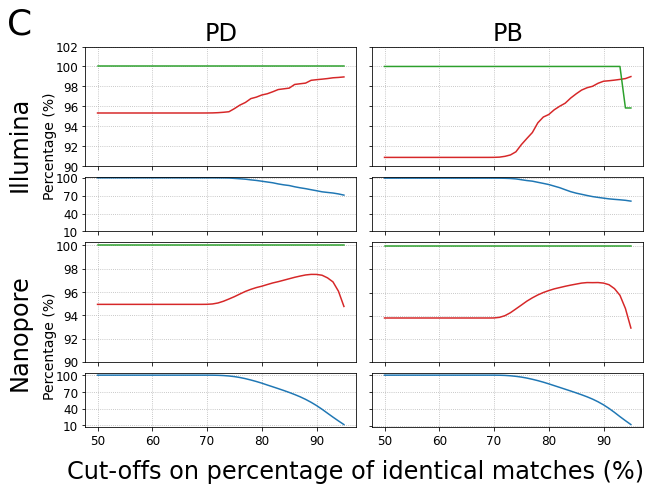

In [103]:
# The range here is for better presentation of the figure, in the actual analysis I did the maximum range of cut-offs.
t = range(50,96)
data1 = pident_df_IE_illumina.precision_rate
data2 = pident_df_IE_illumina.completeness
data3 = pident_df_MC_illumina.precision_rate
data4 = pident_df_MC_illumina.completeness
data5 = pident_df_IE_nanopore.success_rate
data6 = pident_df_IE_nanopore.completeness
data7 = pident_df_MC_nanopore.success_rate
data8 = pident_df_MC_nanopore.completeness
data9 = pident_df_IE_illumina.remaining_rate
data10 = pident_df_MC_illumina.remaining_rate
data11 = pident_df_IE_nanopore.remaining_rate
data12 = pident_df_MC_nanopore.remaining_rate


# Plot figure with subplots of different sizes
fig = plt.figure(1)
# set up subplot grid
gridspec.GridSpec(6,6)

# subplot 1
plt.subplot2grid((6,6), (0,0), colspan=3, rowspan=2)
ax = plt.gca()
ax.axes.xaxis.set_ticklabels([])
ax.plot(t, data1, 'tab:red')
ax.plot(t, data2, 'tab:green')
ax.yaxis.set_ticks(np.arange(90, 103, 2))
ax.xaxis.set_ticks(np.arange(50,96,10))
ax.text(33.5, 88, 'Illumina', fontweight=300, fontsize=24, rotation='vertical')
ax.text(40, 87, 'Percentage (%)', fontweight=300, fontsize=14, rotation='vertical')
ax.title.set_text('PD')
ax.title.set_fontsize(24)
ax.text(33.5, 103.3, 'C', fontweight=300, fontsize=36)
ax.set_yticklabels(np.arange(90, 103, 2), rotation=0, fontsize=12)
ax.xaxis.grid(linestyle='dotted')
ax.yaxis.grid(linestyle='dotted')

# subplot 2
plt.subplot2grid((6,6), (0,3), colspan=3, rowspan=2)
ax = plt.gca()
ax.tick_params(direction='out')
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])
ax.plot(t, data3, 'tab:red')
ax.plot(t, data4, 'tab:green')
ax.yaxis.set_ticks(np.arange(90, 103, 2))
ax.xaxis.set_ticks(np.arange(50,96,10))
ax.title.set_text('PB')
ax.title.set_fontsize(24)
ax.xaxis.grid(linestyle='dotted')
ax.yaxis.grid(linestyle='dotted')

# subplot 3
plt.subplot2grid((6,6), (2,0), colspan=3, rowspan=1)
plt.locator_params(axis='x', nbins=5)
plt.locator_params(axis='y', nbins=5)
ax = plt.gca()
ax.axes.xaxis.set_ticklabels([])
ax.xaxis.set_ticks(np.arange(50, 96, 10))
ax.plot(t, data9, color='tab:blue')
ax.yaxis.set_ticks(np.arange(10, 110, 30))
ax.set_yticklabels(np.arange(10, 110, 30), rotation=0, fontsize=12)
ax.xaxis.grid(linestyle='dotted')
ax.yaxis.grid(linestyle='dotted')

# small subplot 4
plt.subplot2grid((6,6), (2,3), colspan=3, rowspan=1)
plt.locator_params(axis='x', nbins=5)
plt.locator_params(axis='y', nbins=5)
ax = plt.gca()
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])
ax.xaxis.set_ticks(np.arange(50, 96, 10))
ax.plot(t, data10, color='tab:blue')
ax.yaxis.set_ticks(np.arange(10, 110, 30))
ax.xaxis.grid(linestyle='dotted')
ax.yaxis.grid(linestyle='dotted')

# subplot 5
plt.subplot2grid((6,6), (3,0), colspan=3, rowspan=2)
ax = plt.gca()
ax.axes.xaxis.set_ticklabels([])
ax.plot(t, data5, 'tab:red')
ax.plot(t, data6, 'tab:green')
#ax.yaxis.set_ticks(np.arange(90, 101, 2))
ax.yaxis.set_ticks(np.arange(90, 102, 2))
ax.xaxis.set_ticks(np.arange(50,96,10))
ax.text(33.5, 88, 'Nanopore', fontweight=300, fontsize=24, rotation='vertical')
ax.text(40, 87, 'Percentage (%)', fontweight=300, fontsize=14, rotation='vertical')
ax.set_yticklabels(np.arange(90, 102, 2), rotation=0, fontsize=12)
ax.xaxis.grid(linestyle='dotted')
ax.yaxis.grid(linestyle='dotted')

# subplot 6
plt.subplot2grid((6,6), (3,3), colspan=3, rowspan=2)
ax = plt.gca()
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])
ax.plot(t, data7, 'tab:red')
ax.plot(t, data8, 'tab:green')
ax.yaxis.set_ticks(np.arange(90, 102, 2))
ax.xaxis.set_ticks(np.arange(50, 96, 10))
ax.xaxis.grid(linestyle='dotted')
ax.yaxis.grid(linestyle='dotted')

# subplot 7
plt.subplot2grid((6,6), (5,0), colspan=3, rowspan=1)
plt.locator_params(axis='x', nbins=5)
plt.locator_params(axis='y', nbins=5)
ax = plt.gca()
ax.plot(t, data11, color='tab:blue')
ax.yaxis.set_ticks(np.arange(10, 110, 30))
ax.xaxis.set_ticks(np.arange(50, 96, 10))
ax.set_yticklabels(np.arange(10, 110, 30), rotation=0, fontsize=12)
ax.set_xticklabels(np.arange(50, 96, 10), rotation=0, fontsize=12)
ax.xaxis.grid(linestyle='dotted')
ax.yaxis.grid(linestyle='dotted')

# small subplot 8
plt.subplot2grid((6,6), (5,3), colspan=3, rowspan=1)
plt.locator_params(axis='x', nbins=5)
plt.locator_params(axis='y', nbins=5)
ax = plt.gca()
ax.axes.yaxis.set_ticklabels([])
ax.plot(t, data12, color='tab:blue')
ax.xaxis.set_ticks(np.arange(50, 96, 10))
ax.yaxis.set_ticks(np.arange(10, 110, 30))
ax.set_xticklabels(np.arange(50, 96, 10), rotation=0, fontsize=12)
ax.xaxis.grid(linestyle='dotted')
ax.yaxis.grid(linestyle='dotted')

# fit subplots and save fig
fig.set_size_inches(w=10,h=7)
fig.suptitle('Cut-offs on percentage of identical matches (%)', x=0.5, y=0.06, fontsize=24)#
plt.savefig(os.path.join(sourcedir, 'figures', 'Figure2C.png'), bbox_inches="tight", dpi=1000)
#plt.show()

In [7]:
qscore_df_IE_nanopore = get_qscore_df('IE')
qscore_df_MC_nanopore = get_qscore_df('MC')
qscore_df_IE_nanopore = qscore_df_IE_nanopore[qscore_df_IE_nanopore.qscore <15]
qscore_df_MC_nanopore = qscore_df_MC_nanopore[qscore_df_MC_nanopore.qscore <15]

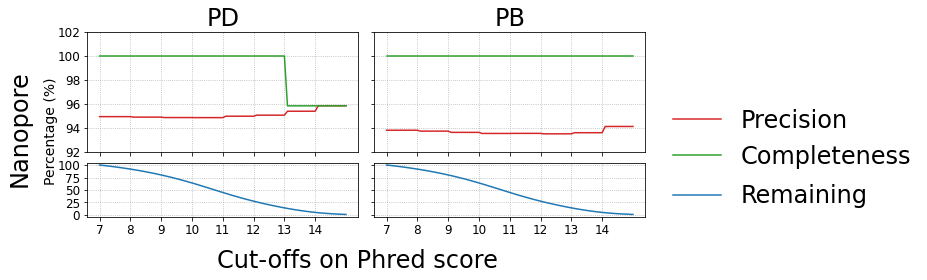

In [156]:
# Generate data
t = np.arange(7, 15.1, 0.1)
data1 = qscore_df_IE_nanopore.success_rate
data2 = qscore_df_IE_nanopore.completeness
data3 = qscore_df_MC_nanopore.success_rate
data4 = qscore_df_MC_nanopore.completeness
data5 = qscore_df_IE_nanopore.remaining_rate
data6 = qscore_df_MC_nanopore.remaining_rate

# Plot figure with subplots of different sizes
fig = plt.figure(1)
# set up subplot grid
gridspec.GridSpec(6,6)

# subplot 1
plt.subplot2grid((6,6), (0,0), colspan=3, rowspan=2)
ax = plt.gca()
ax.axes.xaxis.set_ticklabels([])
ax.plot(t, data1, 'tab:red')
ax.plot(t, data2, 'tab:green')
ax.yaxis.set_ticks(np.arange(92, 104, 2))
ax.xaxis.set_ticks(np.arange(7, 15, 1))
ax.text(4, 89.5, 'Nanopore', fontweight=300, fontsize=24, rotation='vertical')
ax.text(5.2, 89.5, 'Percentage (%)', fontweight=300, fontsize=14, rotation='vertical')
ax.title.set_text('PD')
ax.title.set_fontsize(24)
ax.set_yticklabels(np.arange(92, 104, 2), rotation=0, fontsize=12)
ax.xaxis.grid(linestyle='dotted')
ax.yaxis.grid(linestyle='dotted')

# subplot 2
plt.subplot2grid((6,6), (0,3), colspan=3, rowspan=2)
ax = plt.gca()
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])
ax.plot(t, data3, 'tab:red')
ax.plot(t, data4, 'tab:green')
ax.yaxis.set_ticks(np.arange(92, 104, 2))
ax.xaxis.set_ticks(np.arange(7, 15, 1))
ax.title.set_text('PB')
ax.title.set_fontsize(24)
ax.xaxis.grid(linestyle='dotted')
ax.yaxis.grid(linestyle='dotted')
ax.legend(['Precision','Completeness'], bbox_to_anchor=(1.023, 0.541), fontsize=24, frameon=False)

# subplot 3
plt.subplot2grid((6,6), (2,0), colspan=3, rowspan=1)
plt.locator_params(axis='x', nbins=5)
plt.locator_params(axis='y', nbins=5)
ax = plt.gca()
ax.axes.xaxis.set_ticklabels([])
ax.plot(t, data5, color='tab:blue')
ax.yaxis.set_ticks(np.arange(0, 110, 25))
ax.xaxis.set_ticks(np.arange(7, 15, 1))
ax.set_yticklabels(np.arange(0, 110, 25), rotation=0, fontsize=12)
ax.xaxis.grid(linestyle='dotted')
ax.yaxis.grid(linestyle='dotted')
ax.set_yticklabels(np.arange(0, 110, 25), rotation=0, fontsize=12)
ax.set_xticklabels(np.arange(7, 15, 1), rotation=0, fontsize=12)

# small subplot 4
plt.subplot2grid((6,6), (2,3), colspan=3, rowspan=1)
plt.locator_params(axis='x', nbins=5)
plt.locator_params(axis='y', nbins=5)
ax = plt.gca()
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])
ax.plot(t, data5, color='tab:blue')
ax.xaxis.set_ticks(np.arange(7, 15, 1))
ax.yaxis.set_ticks(np.arange(0, 110, 25))
ax.xaxis.grid(linestyle='dotted')
ax.yaxis.grid(linestyle='dotted')
ax.legend(['Remaining'], bbox_to_anchor=(1.9, 1), fontsize=24, frameon=False)
ax.set_xticklabels(np.arange(7, 15, 1), rotation=0, fontsize=12)

fig.set_size_inches(w=10,h=7)
fig.suptitle('Cut-offs on Phred score', x=0.5, y=0.45, fontsize=24)
plt.savefig(os.path.join(sourcedir, 'figures', 'FigureS2_qscore.png'), bbox_inches="tight", dpi=1000)
#plt.show()

In [9]:
length_df_IE_illumina = get_length_df('IE', 'illumina')
length_df_MC_illumina = get_length_df('MC', 'illumina')
length_df_IE_nanopore = get_length_df('IE', 'nanopore')
length_df_MC_nanopore = get_length_df('MC', 'nanopore')

In [10]:
length_df_IE_illumina = length_df_IE_illumina[length_df_IE_illumina.length <10000]
length_df_MC_illumina = length_df_MC_illumina[length_df_MC_illumina.length <10000]
length_df_IE_nanopore = length_df_IE_nanopore[length_df_IE_nanopore.length <10000]
length_df_MC_nanopore = length_df_MC_nanopore[length_df_MC_nanopore.length <10000]

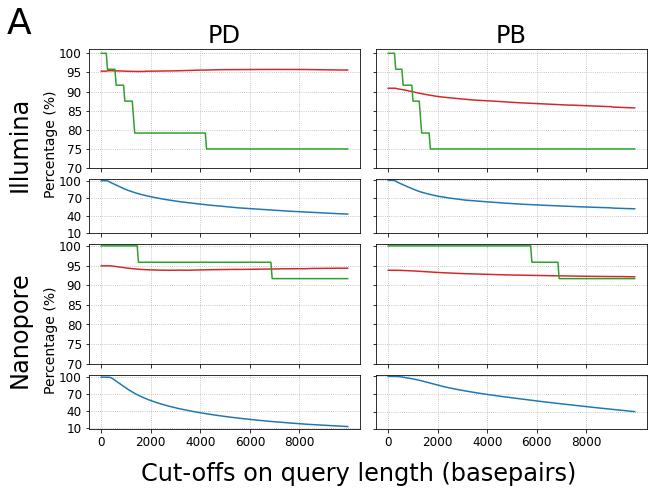

In [158]:
# Generate data
t = np.arange(0, 10000, 50)
data1 = length_df_IE_illumina.precision_rate
data2 = length_df_IE_illumina.completeness
data3 = length_df_MC_illumina.precision_rate
data4 = length_df_MC_illumina.completeness
data5 = length_df_IE_nanopore.success_rate
data6 = length_df_IE_nanopore.completeness
data7 = length_df_MC_nanopore.success_rate
data8 = length_df_MC_nanopore.completeness
data9 = length_df_IE_illumina.remaining_rate
data10 = length_df_MC_illumina.remaining_rate
data11 = length_df_IE_nanopore.remaining_rate
data12 = length_df_MC_nanopore.remaining_rate


# Plot figure with subplots of different sizes
fig = plt.figure(1)
# set up subplot grid
gridspec.GridSpec(6,6)

# subplot 1
plt.subplot2grid((6,6), (0,0), colspan=3, rowspan=2)
ax = plt.gca()
ax.axes.xaxis.set_ticklabels([])
ax.plot(t, data1, 'tab:red')
ax.plot(t, data2, 'tab:green')
ax.yaxis.set_ticks(np.arange(70, 103, 5))
ax.xaxis.set_ticks(np.arange(0, 10000, 2000))
ax.text(-3800, 65, 'Illumina', fontweight=300, fontsize=24, rotation='vertical')
ax.text(-2300, 63, 'Percentage (%)', fontweight=300, fontsize=14, rotation='vertical')
ax.title.set_text('PD')
ax.title.set_fontsize(24)
ax.text(-3800, 105, 'A', fontweight=300, fontsize=36)
ax.set_yticklabels(np.arange(70, 103, 5), rotation=0, fontsize=12)
ax.xaxis.grid(linestyle='dotted')
ax.yaxis.grid(linestyle='dotted')

# subplot 2
plt.subplot2grid((6,6), (0,3), colspan=3, rowspan=2)
ax = plt.gca()
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])
ax.plot(t, data3, 'tab:red')
ax.plot(t, data4, 'tab:green')
ax.yaxis.set_ticks(np.arange(70, 103, 5))
ax.xaxis.set_ticks(np.arange(0, 10000, 2000))
ax.title.set_text('PB')
ax.title.set_fontsize(24)
ax.xaxis.grid(linestyle='dotted')
ax.yaxis.grid(linestyle='dotted')

# subplot 3
plt.subplot2grid((6,6), (2,0), colspan=3, rowspan=1)
plt.locator_params(axis='x', nbins=5)
plt.locator_params(axis='y', nbins=5)
ax = plt.gca()
ax.axes.xaxis.set_ticklabels([])
ax.plot(t, data9, color='tab:blue')
ax.yaxis.set_ticks(np.arange(10, 110, 30))
ax.xaxis.set_ticks(np.arange(0, 10000, 2000))
ax.set_yticklabels(np.arange(10, 110, 30), rotation=0, fontsize=12)
ax.xaxis.grid(linestyle='dotted')
ax.yaxis.grid(linestyle='dotted')


# small subplot 4
plt.subplot2grid((6,6), (2,3), colspan=3, rowspan=1)
plt.locator_params(axis='x', nbins=5)
plt.locator_params(axis='y', nbins=5)
ax = plt.gca()
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])
ax.plot(t, data10, color='tab:blue')
ax.xaxis.set_ticks(np.arange(0, 10000, 2000))
ax.yaxis.set_ticks(np.arange(10, 110, 30))
ax.xaxis.grid(linestyle='dotted')
ax.yaxis.grid(linestyle='dotted')

# subplot 5
plt.subplot2grid((6,6), (3,0), colspan=3, rowspan=2)
ax = plt.gca()
ax.axes.xaxis.set_ticklabels([])
ax.plot(t, data5, 'tab:red')
ax.plot(t, data6, 'tab:green')
#ax.yaxis.set_ticks(np.arange(90, 101, 2))
ax.yaxis.set_ticks(np.arange(70, 103, 5))
ax.xaxis.set_ticks(np.arange(0, 10000, 2000))
ax.text(-3800, 65, 'Nanopore', fontweight=300, fontsize=24, rotation='vertical')
ax.text(-2300, 63, 'Percentage (%)', fontweight=300, fontsize=14, rotation='vertical')
ax.set_yticklabels(np.arange(70, 103, 5), rotation=0, fontsize=12)
ax.xaxis.grid(linestyle='dotted')
ax.yaxis.grid(linestyle='dotted')

# subplot 6
plt.subplot2grid((6,6), (3,3), colspan=3, rowspan=2)
ax = plt.gca()
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])
ax.plot(t, data7, 'tab:red')
ax.plot(t, data8, 'tab:green')
ax.yaxis.set_ticks(np.arange(70, 103, 5))
ax.xaxis.set_ticks(np.arange(0, 10000, 2000))
ax.xaxis.grid(linestyle='dotted')
ax.yaxis.grid(linestyle='dotted')


# subplot 7
plt.subplot2grid((6,6), (5,0), colspan=3, rowspan=1)
plt.locator_params(axis='x', nbins=5)
plt.locator_params(axis='y', nbins=5)
ax = plt.gca()
ax.plot(t, data11, color='tab:blue')
ax.yaxis.set_ticks(np.arange(10, 110, 30))
ax.xaxis.set_ticks(np.arange(0, 10000, 2000))
ax.set_yticklabels(np.arange(10, 110, 30), rotation=0, fontsize=12)
ax.set_xticklabels(np.arange(0, 10000, 2000), rotation=0, fontsize=12)
ax.xaxis.grid(linestyle='dotted')
ax.yaxis.grid(linestyle='dotted')

# small subplot 8
plt.subplot2grid((6,6), (5,3), colspan=3, rowspan=1)
plt.locator_params(axis='x', nbins=5)
plt.locator_params(axis='y', nbins=5)
ax = plt.gca()
ax.axes.yaxis.set_ticklabels([])
ax.plot(t, data12, color='tab:blue')
ax.xaxis.set_ticks(np.arange(0, 10000, 2000))
ax.yaxis.set_ticks(np.arange(10, 110, 30))
ax.set_xticklabels(np.arange(0, 10000, 2000), rotation=0, fontsize=12)
ax.xaxis.grid(linestyle='dotted')
ax.yaxis.grid(linestyle='dotted')

# if wants to add a line
#line = plt.Line2D((.512,.512),(.08,.92), color="k", linewidth=3)
#fig.add_artist(line)

fig.set_size_inches(w=10,h=7)
fig.suptitle('Cut-offs on query length (basepairs)', x=0.5, y=0.06, fontsize=24)
plt.savefig(os.path.join(sourcedir, 'figures', 'Figure2A.png'), bbox_inches="tight", dpi=1000)
#plt.show()

In [12]:
evalue_df_IE_illumina = get_evalue_df('IE', 'illumina')
evalue_df_MC_illumina = get_evalue_df('MC', 'illumina')
evalue_df_IE_nanopore = get_evalue_df('IE', 'nanopore')
evalue_df_MC_nanopore = get_evalue_df('MC', 'nanopore')

In [13]:
evalue_df_IE_illumina = evalue_df_IE_illumina[evalue_df_IE_illumina.evalue <=400]
evalue_df_MC_illumina = evalue_df_MC_illumina[evalue_df_MC_illumina.evalue <=400]
evalue_df_IE_nanopore = evalue_df_IE_nanopore[evalue_df_IE_nanopore.evalue <=400]
evalue_df_MC_nanopore = evalue_df_MC_nanopore[evalue_df_MC_nanopore.evalue <=400]

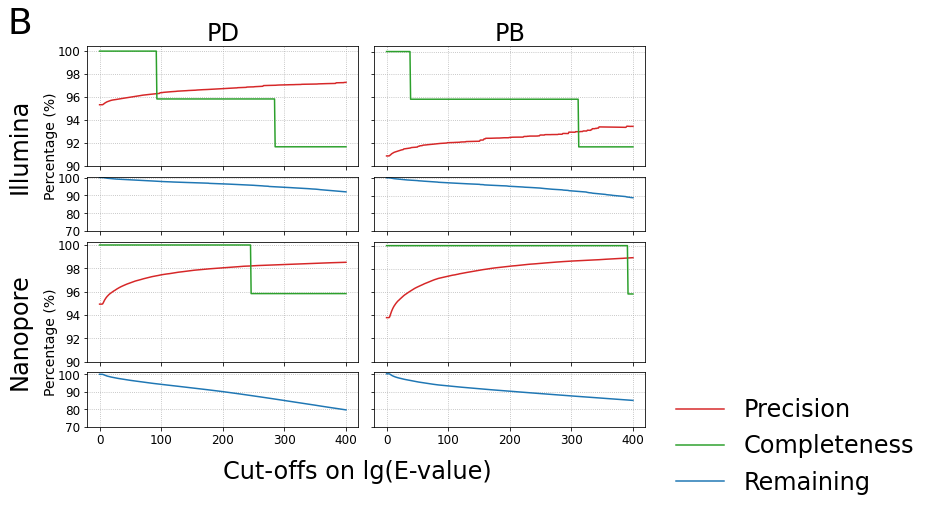

In [130]:
# Generate data
t = range(0,401)
data1 = evalue_df_IE_illumina.success_rate
data2 = evalue_df_IE_illumina.completeness
data3 = evalue_df_MC_illumina.success_rate
data4 = evalue_df_MC_illumina.completeness
data5 = evalue_df_IE_nanopore.success_rate
data6 = evalue_df_IE_nanopore.completeness
data7 = evalue_df_MC_nanopore.success_rate
data8 = evalue_df_MC_nanopore.completeness
data9 = evalue_df_IE_illumina.remaining_rate
data10 = evalue_df_MC_illumina.remaining_rate
data11 = evalue_df_IE_nanopore.remaining_rate
data12 = evalue_df_MC_nanopore.remaining_rate


# Plot figure with subplots of different sizes
fig = plt.figure(1)
# set up subplot grid
gridspec.GridSpec(6,6)

# subplot 1
plt.subplot2grid((6,6), (0,0), colspan=3, rowspan=2)
ax = plt.gca()
ax.axes.xaxis.set_ticklabels([])
ax.plot(t, data1, 'tab:red')
ax.plot(t, data2, 'tab:green')
ax.yaxis.set_ticks(np.arange(90, 101, 2))
ax.xaxis.set_ticks(np.arange(0, 401, 100))
ax.text(-150, 88, 'Illumina', fontweight=300, fontsize=24, rotation='vertical')
ax.text(-90, 87.3, 'Percentage (%)', fontweight=300, fontsize=14, rotation='vertical')
ax.title.set_text('PD')
ax.title.set_fontsize(24)
ax.text(-150, 101.5, 'B', fontweight=300, fontsize=36)
ax.set_yticklabels(np.arange(90, 101, 2), rotation=0, fontsize=12)
ax.xaxis.grid(linestyle='dotted')
ax.yaxis.grid(linestyle='dotted')

# subplot 2
plt.subplot2grid((6,6), (0,3), colspan=3, rowspan=2)
ax = plt.gca()
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])
ax.plot(t, data3, 'tab:red')
ax.plot(t, data4, 'tab:green')
ax.yaxis.set_ticks(np.arange(90, 101, 2))
ax.xaxis.set_ticks(np.arange(0, 401, 100))
ax.title.set_text('PB')
ax.title.set_fontsize(24)
ax.xaxis.grid(linestyle='dotted')
ax.yaxis.grid(linestyle='dotted')
ax.legend(['Precision','Completeness'], bbox_to_anchor=(2.07, -1.761), fontsize=24, frameon=False)

# subplot 3
plt.subplot2grid((6,6), (2,0), colspan=3, rowspan=1)
plt.locator_params(axis='x', nbins=5)
plt.locator_params(axis='y', nbins=5)
ax = plt.gca()
ax.axes.xaxis.set_ticklabels([])
ax.plot(t, data9, color='tab:blue')
ax.yaxis.set_ticks(np.arange(70, 103, 10))
ax.set_yticklabels(np.arange(70, 103, 10), rotation=0, fontsize=12)
ax.xaxis.grid(linestyle='dotted')
ax.yaxis.grid(linestyle='dotted')


# small subplot 4
plt.subplot2grid((6,6), (2,3), colspan=3, rowspan=1)
plt.locator_params(axis='x', nbins=5)
plt.locator_params(axis='y', nbins=5)
ax = plt.gca()
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])
ax.plot(t, data10, color='tab:blue')
ax.yaxis.set_ticks(np.arange(70, 103, 10))
ax.xaxis.grid(linestyle='dotted')
ax.yaxis.grid(linestyle='dotted')
ax.legend(['Remaining'], bbox_to_anchor=(1.91, -4), fontsize=24, frameon=False)

# subplot 5
plt.subplot2grid((6,6), (3,0), colspan=3, rowspan=2)
ax = plt.gca()
ax.axes.xaxis.set_ticklabels([])
ax.plot(t, data5, 'tab:red')
ax.plot(t, data6, 'tab:green')
#ax.yaxis.set_ticks(np.arange(90, 101, 2))
ax.yaxis.set_ticks(np.arange(90, 101, 2))
ax.xaxis.set_ticks(np.arange(0, 401, 100))
ax.text(-150, 88, 'Nanopore', fontweight=300, fontsize=24, rotation='vertical')
ax.text(-90, 87.3, 'Percentage (%)', fontweight=300, fontsize=14, rotation='vertical')
ax.set_yticklabels(np.arange(90, 101, 2), rotation=0, fontsize=12)
ax.xaxis.grid(linestyle='dotted')
ax.yaxis.grid(linestyle='dotted')

# subplot 6
plt.subplot2grid((6,6), (3,3), colspan=3, rowspan=2)
ax = plt.gca()
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])
ax.plot(t, data7, 'tab:red')
ax.plot(t, data8, 'tab:green')
ax.yaxis.set_ticks(np.arange(90, 101, 2))
ax.xaxis.set_ticks(np.arange(0, 401, 100))
ax.xaxis.grid(linestyle='dotted')
ax.yaxis.grid(linestyle='dotted')


# subplot 7
plt.subplot2grid((6,6), (5,0), colspan=3, rowspan=1)
plt.locator_params(axis='x', nbins=5)
plt.locator_params(axis='y', nbins=5)
ax = plt.gca()
ax.plot(t, data11, color='tab:blue')
ax.yaxis.set_ticks(np.arange(70, 103, 10))
ax.xaxis.set_ticks(np.arange(0, 401, 100))
ax.set_yticklabels(np.arange(70, 103, 10), rotation=0, fontsize=12)
ax.set_xticklabels(np.arange(0, 401, 100), rotation=0, fontsize=12)
ax.xaxis.grid(linestyle='dotted')
ax.yaxis.grid(linestyle='dotted')

# small subplot 8
plt.subplot2grid((6,6), (5,3), colspan=3, rowspan=1)
plt.locator_params(axis='x', nbins=5)
plt.locator_params(axis='y', nbins=5)
ax = plt.gca()
ax.axes.yaxis.set_ticklabels([])
ax.plot(t, data12, color='tab:blue')
ax.xaxis.set_ticks(np.arange(0, 401, 100))
ax.yaxis.set_ticks(np.arange(70, 103, 10))
ax.set_xticklabels(np.arange(0, 401, 100), rotation=0, fontsize=12)
ax.xaxis.grid(linestyle='dotted')
ax.yaxis.grid(linestyle='dotted')

# if wants to add a line, can use this code. It can also be used to add a box for the figure legend.
# line = plt.Line2D((.512,.512),(.08,.92), color="k", linewidth=3)
# fig.add_artist(line)

fig.set_size_inches(w=10,h=7)
fig.suptitle('Cut-offs on lg(E-value)', x=0.5, y=0.06, fontsize=24)
plt.savefig(os.path.join(sourcedir, 'figures', 'Figure2B.png'), bbox_inches="tight", dpi=1000)
#plt.show()

In [15]:
pmatch_df_IE_illumina = get_pmatch_df('IE', 'illumina')
pmatch_df_MC_illumina = get_pmatch_df('MC', 'illumina')
pmatch_df_IE_nanopore = get_pmatch_df('IE', 'nanopore')
pmatch_df_MC_nanopore = get_pmatch_df('MC', 'nanopore')

In [16]:
pmatch_df_IE_illumina = pmatch_df_IE_illumina[pmatch_df_IE_illumina.pmatch <=75]
pmatch_df_MC_illumina = pmatch_df_MC_illumina[pmatch_df_MC_illumina.pmatch <=75]
pmatch_df_IE_nanopore = pmatch_df_IE_nanopore[pmatch_df_IE_nanopore.pmatch <=75]
pmatch_df_MC_nanopore = pmatch_df_MC_nanopore[pmatch_df_MC_nanopore.pmatch <=75]

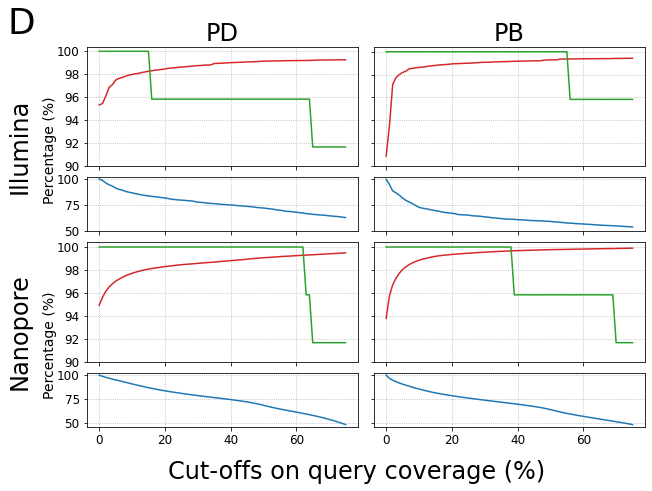

In [159]:
# Generate data
t = range(0,76)
data1 = pmatch_df_IE_illumina.precision_rate
data2 = pmatch_df_IE_illumina.completeness
data3 = pmatch_df_MC_illumina.precision_rate
data4 = pmatch_df_MC_illumina.completeness
data5 = pmatch_df_IE_nanopore.success_rate
data6 = pmatch_df_IE_nanopore.completeness
data7 = pmatch_df_MC_nanopore.success_rate
data8 = pmatch_df_MC_nanopore.completeness
data9 = pmatch_df_IE_illumina.remaining_rate
data10 = pmatch_df_MC_illumina.remaining_rate
data11 = pmatch_df_IE_nanopore.remaining_rate
data12 = pmatch_df_MC_nanopore.remaining_rate


# Plot figure with subplots of different sizes
fig = plt.figure(1)
# set up subplot grid
gridspec.GridSpec(6,6)

# subplot 1
plt.subplot2grid((6,6), (0,0), colspan=3, rowspan=2)
ax = plt.gca()
ax.axes.xaxis.set_ticklabels([])
ax.plot(t, data1, 'tab:red')
ax.plot(t, data2, 'tab:green')
ax.yaxis.set_ticks(np.arange(90, 101, 2))
ax.xaxis.set_ticks(np.arange(0, 76, 20))
ax.text(-28, 88, 'Illumina', fontweight=300, fontsize=24, rotation='vertical')
ax.text(-17, 87, 'Percentage (%)', fontweight=300, fontsize=14, rotation='vertical')
ax.title.set_text('PD')
ax.title.set_fontsize(24)
ax.text(-28, 101.5, 'D', fontweight=300, fontsize=36)
ax.set_yticklabels(np.arange(90, 101, 2), rotation=0, fontsize=12)
ax.xaxis.grid(linestyle='dotted')
ax.yaxis.grid(linestyle='dotted')

# subplot 2
plt.subplot2grid((6,6), (0,3), colspan=3, rowspan=2)
ax = plt.gca()
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])
ax.plot(t, data3, 'tab:red')
ax.plot(t, data4, 'tab:green')
ax.yaxis.set_ticks(np.arange(90, 101, 2))
ax.xaxis.set_ticks(np.arange(0, 76, 20))
ax.title.set_text('PB')
ax.title.set_fontsize(24)
ax.xaxis.grid(linestyle='dotted')
ax.yaxis.grid(linestyle='dotted')

# subplot 3
plt.subplot2grid((6,6), (2,0), colspan=3, rowspan=1)
plt.locator_params(axis='x', nbins=5)
plt.locator_params(axis='y', nbins=5)
ax = plt.gca()
ax.axes.xaxis.set_ticklabels([])
ax.plot(t, data9, color='tab:blue')
ax.yaxis.set_ticks(np.arange(50, 110, 25))
ax.set_yticklabels(np.arange(50, 110, 25), rotation=0, fontsize=12)
ax.xaxis.grid(linestyle='dotted')
ax.yaxis.grid(linestyle='dotted')


# small subplot 4
plt.subplot2grid((6,6), (2,3), colspan=3, rowspan=1)
plt.locator_params(axis='x', nbins=5)
plt.locator_params(axis='y', nbins=5)
ax = plt.gca()
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])
ax.plot(t, data10, color='tab:blue')
ax.yaxis.set_ticks(np.arange(50, 110, 25))
ax.xaxis.grid(linestyle='dotted')
ax.yaxis.grid(linestyle='dotted')


# subplot 5
plt.subplot2grid((6,6), (3,0), colspan=3, rowspan=2)
ax = plt.gca()
ax.axes.xaxis.set_ticklabels([])
ax.plot(t, data5, 'tab:red')
ax.plot(t, data6, 'tab:green')
#ax.yaxis.set_ticks(np.arange(90, 101, 2))
ax.yaxis.set_ticks(np.arange(90, 101, 2))
ax.xaxis.set_ticks(np.arange(0, 76, 20))
ax.text(-28, 88, 'Nanopore', fontweight=300, fontsize=24, rotation='vertical')
ax.text(-17, 87, 'Percentage (%)', fontweight=300, fontsize=14, rotation='vertical')
ax.yaxis.set_label_coords(-0.15,0.15)
ax.set_yticklabels(np.arange(90, 101, 2), rotation=0, fontsize=12)
ax.xaxis.grid(linestyle='dotted')
ax.yaxis.grid(linestyle='dotted')

# subplot 6
plt.subplot2grid((6,6), (3,3), colspan=3, rowspan=2)
ax = plt.gca()
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])
ax.plot(t, data7, 'tab:red')
ax.plot(t, data8, 'tab:green')
ax.yaxis.set_ticks(np.arange(90, 101, 2))
ax.xaxis.set_ticks(np.arange(0, 76, 20))
ax.xaxis.grid(linestyle='dotted')
ax.yaxis.grid(linestyle='dotted')


# subplot 7
plt.subplot2grid((6,6), (5,0), colspan=3, rowspan=1)
plt.locator_params(axis='x', nbins=5)
plt.locator_params(axis='y', nbins=5)
ax = plt.gca()
ax.plot(t, data11, color='tab:blue')
ax.yaxis.set_ticks(np.arange(50, 110, 25))
ax.xaxis.set_ticks(np.arange(0, 76, 20))
ax.set_yticklabels(np.arange(50, 110, 25), rotation=0, fontsize=12)
ax.set_xticklabels(np.arange(0, 76, 20), rotation=0, fontsize=12)
ax.xaxis.grid(linestyle='dotted')
ax.yaxis.grid(linestyle='dotted')

# small subplot 8
plt.subplot2grid((6,6), (5,3), colspan=3, rowspan=1)
plt.locator_params(axis='x', nbins=5)
plt.locator_params(axis='y', nbins=5)
ax = plt.gca()
ax.axes.yaxis.set_ticklabels([])
ax.plot(t, data12, color='tab:blue')
ax.xaxis.set_ticks(np.arange(0, 76, 20))
ax.yaxis.set_ticks(np.arange(50, 110, 25))
ax.set_xticklabels(np.arange(0, 76, 20), rotation=0, fontsize=12)
ax.xaxis.grid(linestyle='dotted')
ax.yaxis.grid(linestyle='dotted')

# fit subplots and save fig
fig.set_size_inches(w=10,h=7)
fig.suptitle('Cut-offs on query coverage (%)', x=0.5, y=0.06, fontsize=24)
plt.savefig(os.path.join(sourcedir, 'figures', 'Figure2D.png'), bbox_inches="tight", dpi=1000)
#plt.show()